# Bus
This notebook contains the solutions to the exercises in chapter 7 of the book. It looks like the exercises changed in the second edition of the book (see [here](https://github.com/francescolosterzo/ThinkBayes2/blob/master/code/chap07.ipynb)).
So in this notebook I'll solve the exercises on the book (on my version, at least) and then move on to solve the ones in the notebook linked above.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import thinkbayes2
import thinkplot

**Ex. 7.1**:
If buses arrive at a bus stop every 20 minutes, and you arrive at the bus stop at a random time, your wait time until the bus arrives is uniformly distributed from 0 to 20 minutes.

But in reality, there is variability in the time between buses. Suppose you are waiting for a bus, and you know the historical distribution of time between buses. Compute your distribution of wait times.

*Hint*: Suppose that the time between buses is either 5 or 10 minutes with equal probability. What is the probability that you arrive during one of the 10 minute intervals?


**Solution**: the first sentence can be written in terms of probability as follows:

P($\Delta$t = 20min) = 1  
P(wait) = uniform(0,20)

Following the hint of the two possible waiting times, we have:

P($\Delta$t = 5min) = 0.5  
P($\Delta$t = 10min) = 0.5

and each of them brings to an uniform distribution between 0 and $\Delta$t. So the final P(wait) is the combination of the two components:

P(wait) = P($\Delta$t = 5min) $\times$ uniform(0,5) + P($\Delta$t = 10min) $\times$ uniform(0,10)

Using Allen's machinery this can be easily computed with "mixtures". Let's first define a class `Wait` (similar to the class `Die` introduced when showing mixtures).

In [2]:
class Wait(thinkbayes2.Pmf):
    '''
    represent the waiting time for a bus
    '''
    def __init__(self, minutes, label=''):
        '''
        initialize
        * minutes: number of minutes between buses
        * label: string
        '''
        
        hypos = range(0, minutes)
        thinkbayes2.Pmf.__init__(self, hypos, label=label)

Double check: model the example in the first sentence.

In [3]:
wait = Wait(20)

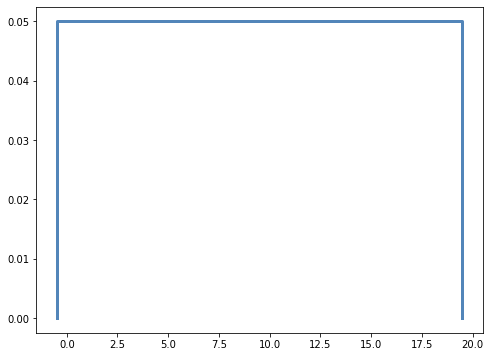

In [4]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)

thinkplot.Pmf(wait)

Get the probability distribution of `wait` in the case proposed by the exercise.

In [5]:
w5 = Wait(5)
w10 = Wait(10)

In [6]:
wait = thinkbayes2.Pmf()

wait.Set(w5, 0.5)
wait.Set(w10, 0.5)

wait.Normalize()

1.0

In [7]:
mix = thinkbayes2.MakeMixture(wait)

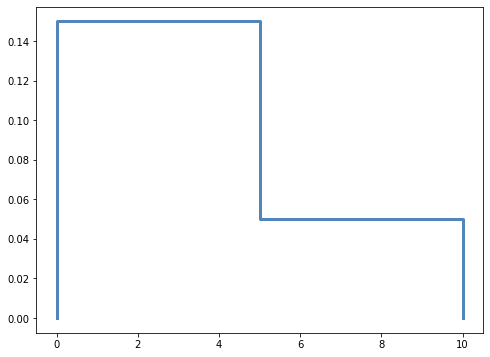

In [9]:
thinkplot.Clf()
thinkplot.PrePlot(num=1)

thinkplot.Pmf(mix, align='left')

**Ex. 7.2**: Suppose that passengers arriving at the bus stop are well-modeled by a Poisson process with parameter λ. If you arrive at the stop and find 3 people waiting, what is your posterior distribution for the time since the last bus arrived.

**Solution**:

Here we want to compute the time since the last bus arrived starting from the observation of $n$ = 3 people. The key is that the time between events from a Poisson process with parameter $\lambda$ is given by an exponential distribution.

Let's outline all the ingredients we have/need:
* P($\rm{t}_{\rm{bus}}$), i.e. the prior distribution of the time between arrivals of the *buses*
* P($n$) ~ Poisson($\lambda$), i.e.  the probability of having $n$ people arriving at the bus stop
    * P($\rm{t}_{\rm person}$) ~ $\lambda e^{-\lambda t}$, i.e. the probability distribution of the time between *people* arriving at the bus stop
    
We want to compute the posterior distribution of the time since the last bus, i.e.: P($\rm{t_{bus}}$|$n$). The whole point is that $n$ is connected to time because of the Possion <--> Exponential link.

**Thougts:** the complex part of this problem is that two different things are mixed, i.e. the time of the *buses* and the time of the *people*. I guess that in general one should try to get a probability distribution for $\lambda$ and use it in the rest of the exercise.

Also here in the end it all boils down to computing something like the probability of $\rm{t_{bus}}$ being $n$ times higher than $\rm{t_{people}}$.

In [22]:
class People(thinkbayes2.Suite):
    """
    represents hypothesis about people arriving at the bus stop.
    """
    def __init__(self, label=None):
        low = 0
        high = 15
        
        pmf = thinkbayes2.MakeUniformPmf(low, high, 101)
        thinkbayes2.Suite.__init__(self, pmf, label=label)
        
    def Likelihood(self, data, hypo):
        """
        Computes the likelihood of the data under the hypothesis.
        Evaluates the Poisson PMF for lambda and k.
        * hypo: rate of people arriving at the bus stop
        * data: people observed at the bus stop
        """
        
        lam = hypo
        k = data
        like = thinkbayes2.EvalPoissonPmf(k, lam)
        
        return like

In [23]:
suite = People()

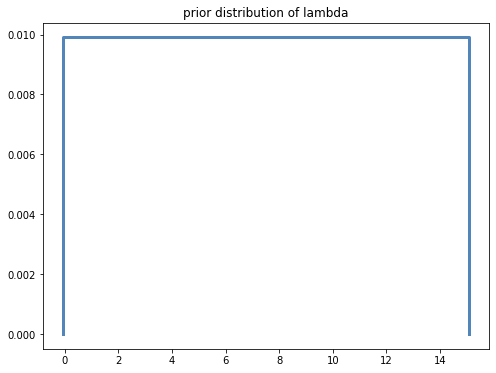

In [24]:
thinkplot.Clf()

thinkplot.PrePlot(num=1)
thinkplot.Pmf(suite)

plt.title('prior distribution of lambda');

Now update the suite with the observed data:

In [25]:
suite.UpdateSet([3])

0.0659935292454853

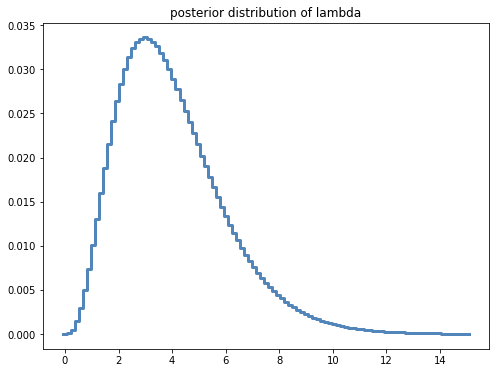

In [26]:
thinkplot.Clf()

thinkplot.PrePlot(num=1)
thinkplot.Pmf(suite)

plt.title('posterior distribution of lambda');